# COGS 108 - Significant Factors that Contribute to Housing Price in San Diego, CA

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Ethan Jensen
- Katherine Gao
- Shawn Phua
- Shawn Summerville

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

For single-family homes sold in San Diego County between 2000-2025, which physical attributes (square footage, bedrooms, bathrooms, lot size, age), location characteristics (school ratings, crime rates, distance to coast), and neighborhood features (median income, walkability score) are the strongest predictors of final sale prices?

## Background and Prior Work

For UCSD students, it's been really rough finding housing at an affordable price here in San Diego. We wanted to know what features to potentially skip out on, or determine how to better find cheaper homes. San Diego's housing market is one of the most dynamic and competitive in California, driven by limited inventory, high demand (esp. around colleges), and its desirable location by the beach<a name=\"cite_ref-1\"></a>[<sup>1</sup>](#cite_note-1). With rapid urban development and shifting demographics, property attributes like square footage, number of bedrooms and bathrooms, property age, and neighborhood quality are believed to significantly influence housing sale prices. We aim to see which features are the most important in determining price.

Previous research in similar urban coastal regions has demonstrated that property features play a critical role in determining sale prices. A study focused on the San Francisco Bay Area found that larger homes and those situated in highly desirable neighborhoods tend have significantly higher prices<a name=\"cite_ref-2\"></a>[<sup>2</sup>](#cite_note-2). Additionally, reports from the California Association of Realtors have highlighted that microeconomic factors (local economic conditions, neighborhood amenities, etc.) substantially affect housing prices across the state<a name=\"cite_ref-3\"></a>[<sup>3</sup>](#cite_note-3). We believe the information can be determined from analyzing San Diego, especially as a resident, with data related to a property's qualities and price<a name=\"cite_ref-4\"></a>[<sup>4</sup>](#cite_note-4)

Despite these findings, many existing studies either concentrate on broader statewide trends or rely on aggregated data that can obscure local variations. Our study aims to fill this gap by focusing specifically on San Diego's market using detailed housing transaction data from Kaggle. By applying both exploratory data analysis and predictive modeling, we intend to quantify the influence of each property feature on sale prices, thereby providing targeted insights into this unique market environment.\n",

**References**

<a name=\"cite_note-1\"></a>[<sup>1</sup>](#cite_ref-1) Zillow. (2023). *San Diego, CA Home Prices & Home Values*. Retrieved from [https://www.zillow.com/san-diego-ca/home-values/](https://www.zillow.com/san-diego-ca/home-values/)

<a name=\"cite_note-2\"></a>[<sup>2</sup>](#cite_ref-2) Redfin. (2022). *San Francisco Housing Market Trends*. Retrieved from [https://www.redfin.com/blog/san-francisco-housing-market/](https://www.redfin.com/blog/san-francisco-housing-market/)

<a name=\"cite_note-3\"></a>[<sup>3</sup>](#cite_ref-3) California Association of Realtors. (2022). *California Housing Market Data*. Retrieved from [https://www.car.org/marketdata/interactive/housingmarketoverview](https://www.car.org/marketdata/interactive/housingmarketoverview)

<a name=\"cite_note-4\"></a>[<sup>4</sup>](#cite_ref-4) Kaggle. (2021). *San Diego Housing Prices Dataset*. Retrieved from [https://www.kaggle.com/datasets/ibtesamaez/san-diego-housing](https://www.kaggle.com/datasets/ibtesamaez/san-diego-housing)\n"

# Hypothesis


Our hypothesize that property features related to area, specifically, square footage and the number of bedrooms and bathrooms, will exhibit a strong positive correlation with sale prices in San Diego. Larger homes and those located in more desirable neighborhoods (e.g., closer to the beach, colleges, and local amenities) are expected to have higher sales prices, even after accounting for other factors such as property age and lot size.

We believe that larger properties offer more living space and convenience, which naturally makes it more valuable, while desirable locations contribute value due to lifestyle and accessibility, so we expect to see a positive relationship between these property attributes and housing sale prices.

# Data

## Data overview

USA Real Estate Dataset
  - Dataset Description: Real Estate listings (2.2M+) in the US broken by State and zip code
  - Link to the dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
  - Number of observations: 2,226,382
  - Number of variables: 12 (used 7)
- This dataset contains individual US house listings on realtor.com with information about price, location, bed, bath, lot size, and sale history. 

U.S. Housing Prices: Regional Trends (2000 - 2023)
  - Dataset Name: Housing Price Index Data for U.S. Cities (Fetched via FRED API)
  - Link to the dataset: https://www.kaggle.com/datasets/praveenchandran2006/u-s-housing-prices-regional-trends-2000-2023
  - Number of observations: 292
  - Number of variables: 24 (used 4)
- This dataset provides historical housing price indices for the United States, covering a span of 20 years from January 2000 onwards. The data includes housing price trends at the national level, as well as for major metropolitan areas such as San Francisco, Los Angeles, New York, and more. It is ideal for understanding how housing prices have evolved over time and exploring regional differences in the housing market.

In [1]:
#preparing for data cleaning

import pandas as pd
import numpy as np

## USA Real Estate Dataset

In [2]:
# read in dataset - note that it is very large and may take a while
realtor = pd.read_csv('realtor-data.csv')

realtor.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
# check property status
realtor['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

We noticed that there are properties that have the status 'ready_to_build' which we are not interested in. We are only interested in houses with determined prices from being sold or for sale.

In [4]:
num_properties = realtor.shape[0]
# filter to constructed houses
realtor = realtor[realtor['status'] != 'ready_to_build']
print(f'We have eliminated {num_properties-realtor.shape[0]} properties that had status "ready_to_build"')

We have eliminated 25067 properties that had status "ready_to_build"


We are not as interested in broker information so we filter the dataset to <code>price</code>, <code>bed</code>, <code>bath</code>, size (<code>acre_lot</code>), and location (<code>city</code>, <code>state</code>, <code>zip_code</code>).

In [5]:
# remove unused variables
realtor_sub=realtor[['price','bed','bath','acre_lot','city','state', 'zip_code', 'house_size']].reset_index(drop=True)

We subset to San Diego as the primary focus of our research.

In [6]:
# subset to San Diego, California only
realtor_sd=realtor_sub[(realtor_sub['city'] == 'San Diego') & (realtor_sub['state'] == 'California')].reset_index(drop=True)

realtor_sd.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,259900.0,2.0,3.0,NaN,San Diego,California,92154.0,1674.0
1,250000.0,3.0,2.0,13.95,San Diego,California,92154.0,1101.0
2,399000.0,4.0,2.0,0.20,San Diego,California,92114.0,1120.0
3,760000.0,NaN,NaN,0.06,San Diego,California,92115.0,NaN
4,1499000.0,9.0,5.0,0.46,San Diego,California,92114.0,3390.0


Next, we remove null duplicate values to be able to do quantitative analysis.

In [7]:
# remove null in all variables
realtor_sd=realtor_sd.dropna(how='any').reset_index(drop=True)

realtor_sd.shape

(4084, 8)

In [8]:
# remove duplicate listings from dataset
sd_properties = realtor_sd.drop_duplicates(keep='first').reset_index(drop=True)

print(sd_properties.shape)

sd_properties.head()

(3686, 8)


,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,250000.0,3.0,2.0,13.95,San Diego,California,92154.0,1101.0
1,399000.0,4.0,2.0,0.20,San Diego,California,92114.0,1120.0
2,1499000.0,9.0,5.0,0.46,San Diego,California,92114.0,3390.0
3,678888.0,3.0,2.0,0.11,San Diego,California,92114.0,2042.0
4,1199900.0,4.0,3.0,0.14,San Diego,California,92115.0,2160.0


In [9]:
# check dtypes
sd_properties.dtypes

price         float64
bed           float64
bath          float64
acre_lot      float64
city           object
state          object
zip_code      float64
house_size    float64
dtype: object

Finally, we convert <code>zip_code</code> to String as it is a categorical variable.

In [10]:
# convert zip code to string as it is categorical

sd_properties['zip_code'] = sd_properties['zip_code'].astype(int).astype(str)

In [11]:
# check dtypes again
sd_properties.dtypes

price         float64
bed           float64
bath          float64
acre_lot      float64
city           object
state          object
zip_code       object
house_size    float64
dtype: object

In [12]:
# export cleaned dataset for easier use
sd_properties.to_csv('sd_properties.csv', index=False)

## U.S. Housing Prices: Regional Trends (2000 - 2023)

In [13]:
us_price_index = pd.read_csv('s_p_housing_data.csv')
# display the first few rows
us_price_index.head()

,Unnamed: 0,U.S. National,20-City Composite,CA-San Francisco,CA-Los Angeles,WA-Seattle,CA-San Diego,NY-New York,IL-Chicago,TX-Dallas,...,GA-Atlanta,10-City Composite,DC-Washington,NV-Las Vegas,FL-Tampa,OR-Portland,NC-Charlotte,MI-Detroit,MN-Minneapolis,OH-Cleveland
0,01-01-2000,100.551,100.589697,101.449954,101.031209,101.077268,101.104565,100.339230,100.564840,100.713363,...,100.378207,100.745303,100.871832,100.401379,100.076269,100.592581,100.665133,100.145625,100.188699,100.531377
1,01-02-2000,101.339,101.692479,104.170604,102.043406,101.657995,102.409576,101.240657,101.411386,103.037318,...,101.289722,101.893169,101.701237,100.904482,100.788643,101.248220,101.103257,100.876064,100.971705,100.509032
2,01-03-2000,102.127,102.783828,107.337223,103.224699,102.944145,104.090945,102.060631,102.427760,102.709025,...,101.675542,103.154350,102.894189,101.437483,101.447056,101.555933,101.135671,101.374341,101.631166,101.166614
3,01-04-2000,102.922,103.996444,110.632994,104.159399,103.482366,105.707104,103.132503,103.411192,103.276750,...,102.703145,104.530843,103.954037,101.595701,102.305717,102.176641,102.271217,101.764303,102.974796,101.738234
4,01-05-2000,103.677,105.252818,113.800513,104.924698,104.217188,107.134849,104.915869,104.391108,103.715387,...,103.267302,106.011979,104.924618,102.046929,103.390546,102.075554,102.243820,102.578368,104.406683,102.158956


In [14]:
# rename the date column
us_price_index.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# convert Date column to datetime format
us_price_index['Date']=pd.to_datetime(us_price_index['Date'], format='mixed', dayfirst=True)

# check that date is properly converted
print(us_price_index['Date'][3].month)

# drop rows with invalid dates (if any)
us_price_index = us_price_index.dropna(subset=['Date']).reset_index(drop=True)

# select only California cities
ca_cities = ['Date', 'CA-San Francisco', 'CA-Los Angeles', 'CA-San Diego']
ca_price_index = us_price_index[ca_cities].copy()

ca_price_index

4


,Date,CA-San Francisco,CA-Los Angeles,CA-San Diego
0,2000-01-01,101.449954,101.031209,101.104565
1,2000-02-01,104.170604,102.043406,102.409576
2,2000-03-01,107.337223,103.224699,104.090945
3,2000-04-01,110.632994,104.159399,105.707104
4,2000-05-01,113.800513,104.924698,107.134849
...,...,...,...,...
287,2023-12-01,350.771316,427.724962,424.066794
288,2024-01-01,351.756608,428.335867,431.890641
289,2024-02-01,352.611896,430.532049,433.000498
290,2024-03-01,352.852673,432.562118,434.585667


In [15]:
# check for missing values
missing_values = ca_price_index.isnull().sum()
missing_values

Date                0
CA-San Francisco    0
CA-Los Angeles      0
CA-San Diego        0
dtype: int64

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [16]:
# import packages for analysis
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

## First Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [17]:
# view descriptive stats for san diego
sd_properties.describe()

,price,bed,bath,acre_lot,house_size
count,3.686000e+03,3686.000000,3686.000000,3686.000000,3686.000000
mean,1.222534e+06,3.092512,2.393923,106.672534,1653.711069
std,8.513344e+06,2.127768,2.063314,2911.577063,1460.198465
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000
25%,6.490000e+05,2.000000,2.000000,0.130000,1057.000000
50%,8.500000e+05,3.000000,2.000000,0.170000,1404.000000
75%,1.273675e+06,4.000000,3.000000,0.687500,1900.000000
max,5.150000e+08,108.000000,108.000000,100000.000000,65960.000000


We remove large houses as we want to focus on properties that students or young professionals would be interested in.

In [18]:
# our project mostly concerns students, so remove large houses
print(sd_properties['bed'].value_counts())

sd_small = sd_properties[(sd_properties['bed'] <= 5) & (sd_properties['bath'] <= 5)]

bed
3.0      1275
2.0       956
4.0       820
1.0       272
5.0       263
6.0        59
7.0        15
8.0        13
9.0         6
12.0        3
10.0        2
108.0       1
14.0        1
Name: count, dtype: int64


We decide to exclude houses larger than 5 bed and bath, as smaller houses make up the vast majority of the dataset.

In [19]:
# check descriptive stats again
sd_small.describe()

,price,bed,bath,acre_lot,house_size
count,3.549000e+03,3549.000000,3549.000000,3549.000000,3549.000000
mean,1.149269e+06,2.936320,2.245703,110.772832,1534.144548
std,8.653646e+06,1.029389,0.850053,2967.181210,723.840453
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000
25%,6.450000e+05,2.000000,2.000000,0.130000,1050.000000
50%,8.490000e+05,3.000000,2.000000,0.170000,1383.000000
75%,1.200000e+06,4.000000,3.000000,0.690000,1821.000000
max,5.150000e+08,5.000000,5.000000,100000.000000,6990.000000


We may need to further adjust based on house and lot size, but the most extreme outliers have been removed.

Because price covers such a wide range, we normalize it to make the data easier to interpret.

In [20]:
# normalize price with natural log
sd_small['price_norm'] = np.log(sd_small['price'])

C:\Users\katie\AppData\Local\Temp\ipykernel_9964\1220795796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_small['price_norm'] = np.log(sd_small['price'])


In [21]:
sd_small.describe()

,price,bed,bath,acre_lot,house_size,price_norm
count,3.549000e+03,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,1.149269e+06,2.936320,2.245703,110.772832,1534.144548,13.683735
std,8.653646e+06,1.029389,0.850053,2967.181210,723.840453,0.521925
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000,11.263181
25%,6.450000e+05,2.000000,2.000000,0.130000,1050.000000,13.377006
50%,8.490000e+05,3.000000,2.000000,0.170000,1383.000000,13.651814
75%,1.200000e+06,4.000000,3.000000,0.690000,1821.000000,13.997832
max,5.150000e+08,5.000000,5.000000,100000.000000,6990.000000,20.059677


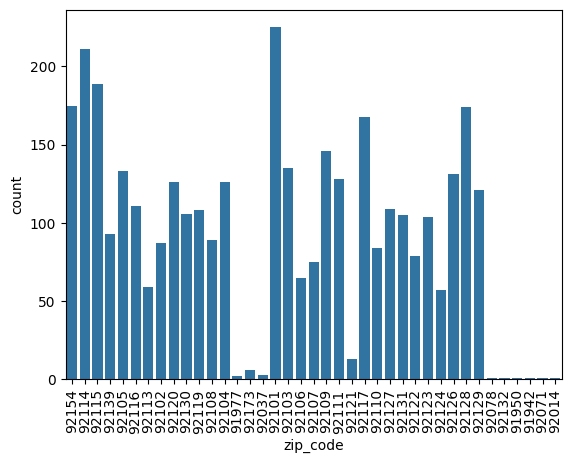

In [22]:
# view distribution of zipcodes
plt.figure()
fig1 = sns.countplot(sd_small, x='zip_code')
plt.xticks(rotation=90)

fig1 = plt.gcf()

Plotting distribution of zipcodes, we see that a few zipcodes see much more listings than others, which could suggest that location does have an affect on house price/desirability.

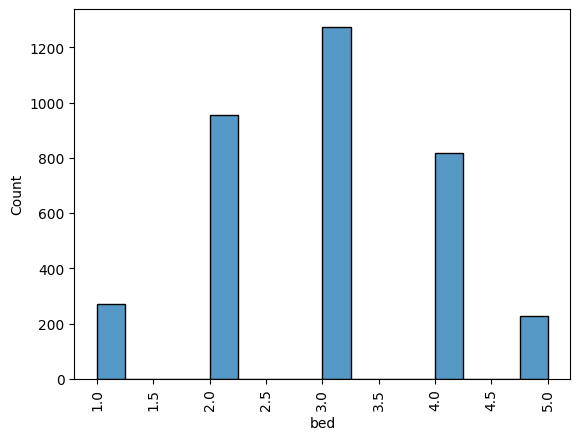

In [23]:
sns.histplot(sd_small, x='bed')
plt.xticks(rotation=90)

fig2 = plt.gcf()

Here, we see the distribution of number of bedrooms in a property.

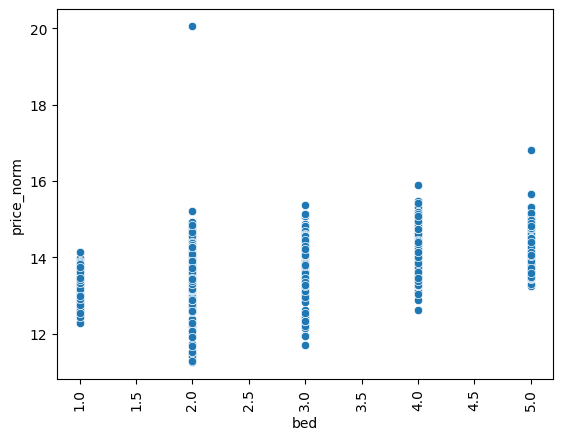

In [24]:
sns.scatterplot(sd_small, x='bed', y='price_norm')
plt.xticks(rotation=90)

fig3 = plt.gcf()

In [25]:
sd_small[sd_small['bed'] == 2].sort_values('price', ascending=False).iloc[0]

price         515000000.0
bed                   2.0
bath                  2.0
acre_lot             2.59
city            San Diego
state          California
zip_code            92119
house_size         1048.0
price_norm      20.059677
Name: 582, dtype: object

Here we see a outlier in price. There is a property with 2 bedrooms that has a significantly higher price. Let's see if other properties in that zip code has a high price.

In [26]:
sd_small[sd_small['zip_code'] == '92119']

,price,bed,bath,acre_lot,city,state,zip_code,house_size,price_norm
108,1049000.0,3.0,3.0,0.33,San Diego,California,92119,1855.0,13.863348
127,900000.0,3.0,2.0,0.14,San Diego,California,92119,1623.0,13.710150
187,999000.0,3.0,2.0,0.21,San Diego,California,92119,1530.0,13.814510
196,860000.0,3.0,2.0,0.13,San Diego,California,92119,1485.0,13.664688
223,1049000.0,4.0,3.0,0.14,San Diego,California,92119,2112.0,13.863348
...,...,...,...,...,...,...,...,...,...
3378,999900.0,3.0,2.0,0.18,San Diego,California,92119,1814.0,13.815411
3388,900000.0,3.0,2.0,0.18,San Diego,California,92119,1778.0,13.710150
3471,1275000.0,4.0,3.0,0.29,San Diego,California,92119,2463.0,14.058457
3542,1150000.0,3.0,3.0,0.15,San Diego,California,92119,1633.0,13.955273


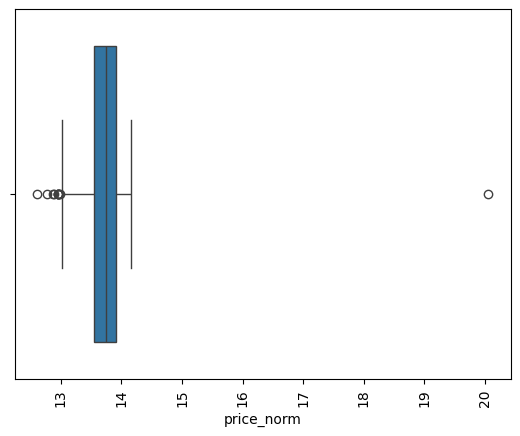

In [27]:
# view distribution of zipcode = 92119
fig1 = sns.boxplot(sd_small[sd_small['zip_code'] == '92119'], x='price_norm')
plt.xticks(rotation=90)

fig4 = plt.gcf()

Looks like most houses aren't around that price point. Let's move on to using machine learning algorithms to determine the significance of these attributes on price.

## Analysis of Housing Price Index

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

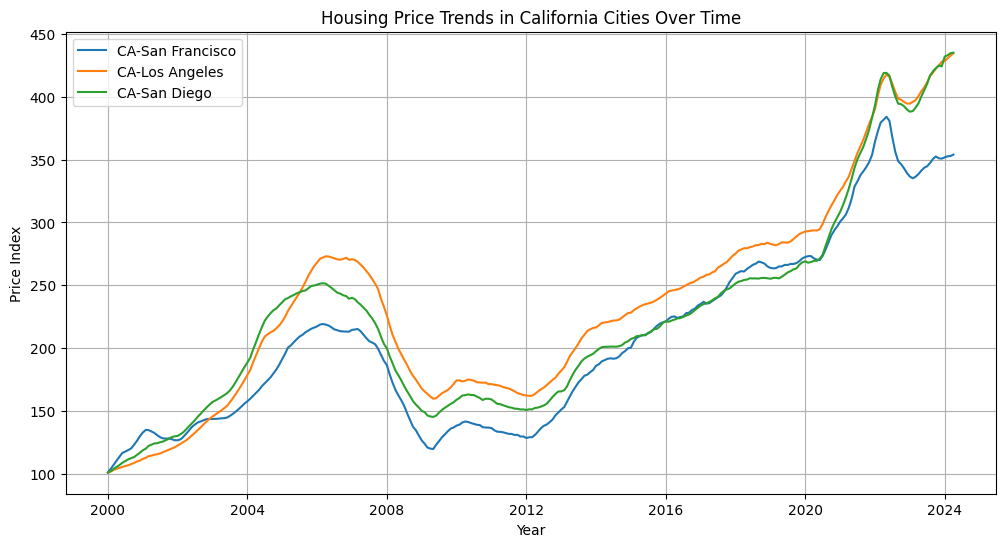

In [28]:
# generate the plot for housing price trends over time
# import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for city in ca_cities[1:]:  
    plt.plot(ca_price_index["Date"], ca_price_index[city], label=city)

plt.title("Housing Price Trends in California Cities Over Time")
plt.xlabel("Year")
plt.ylabel("Price Index")
plt.legend()
plt.grid(True)
plt.show()


## Attribute Correlation with Machine Learning

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

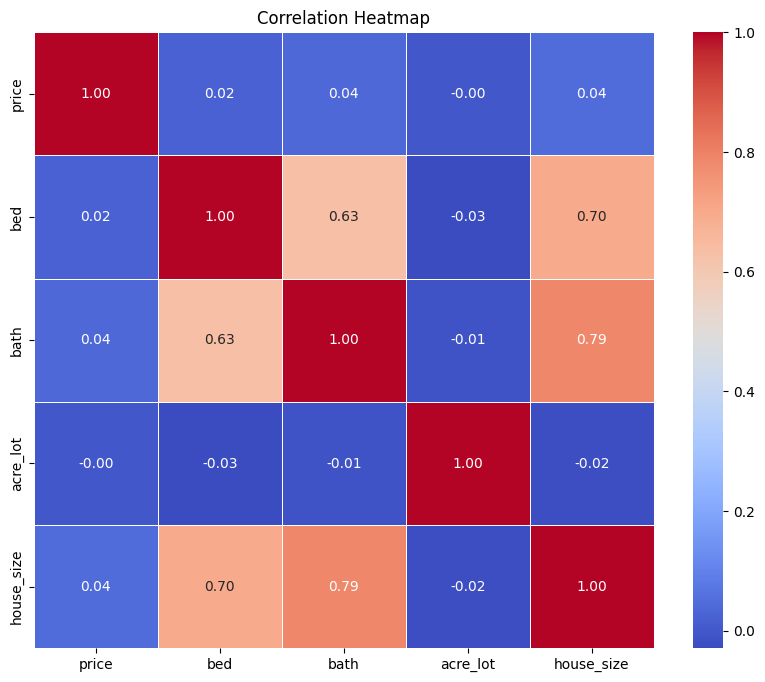

In [29]:
corr_matrix = sd_small[['price', 'bed', 'bath', 'acre_lot', 'house_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

We see that price has a slight correlation with house size, which is heavily correlated with bed and bath. We see that house size, bed, and bath may be multicollinear, but none of these factors have a strong correlation with lot size.

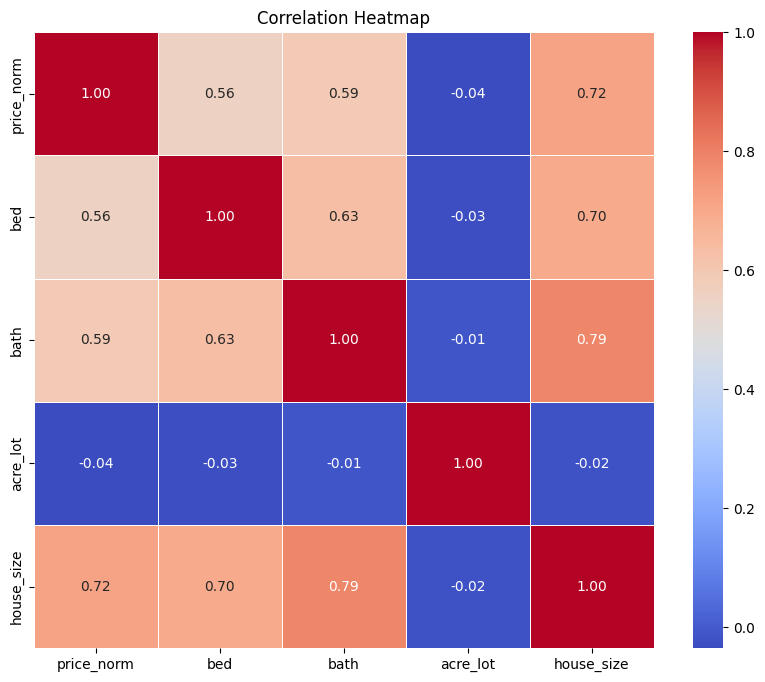

In [30]:
corr_matrix_norm = sd_small[['price_norm', 'bed', 'bath', 'acre_lot', 'house_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_norm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

If we run the correlation with normalized price values, we see that the trends we identified in the true values appear much stronger.

We use OneHotEncoder to encode zipcodes, as they are a non-ordinal categorical variable.

In [31]:
# create encoder
encoder = OneHotEncoder(categories=[sd_small['zip_code'].unique()], handle_unknown='ignore')

In [32]:
# encode zip 
zip_ohe = pd.DataFrame(encoder.fit_transform(sd_small[['zip_code']]).toarray(), columns=[str(i) for i in range(39)])

We concatenate the encoded zip with the rest of the dataset.

In [33]:
# reset index to avoid conflicts 
sd_small = sd_small.reset_index(drop=True)
zip_ohe = zip_ohe.reset_index(drop=True)

# Now concatenate safely
df_combined = pd.concat([sd_small, zip_ohe], axis=1)

In [34]:
# view dataset 
df_combined

,price,bed,bath,acre_lot,city,state,zip_code,house_size,price_norm,0,...,29,30,31,32,33,34,35,36,37,38
0,250000.0,3.0,2.0,13.95,San Diego,California,92154,1101.0,12.429216,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,399000.0,4.0,2.0,0.20,San Diego,California,92114,1120.0,12.896717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,678888.0,3.0,2.0,0.11,San Diego,California,92114,2042.0,13.428211,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1199900.0,4.0,3.0,0.14,San Diego,California,92115,2160.0,13.997749,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725000.0,3.0,2.0,0.11,San Diego,California,92114,1128.0,13.493927,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,695000.0,1.0,2.0,0.69,San Diego,California,92101,1111.0,13.451667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,675000.0,2.0,2.0,0.48,San Diego,California,92103,1106.0,13.422468,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,975000.0,3.0,3.0,4.69,San Diego,California,92128,2312.0,13.790193,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3547,2700000.0,5.0,3.0,0.29,San Diego,California,92103,3373.0,14.808762,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# extract normalized prices for training
price_norm = df_combined['price_norm']

We scale the data with MinMaxScaler to reduce the range of values and improve model performance.

In [36]:
# scale data to improve training performance 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_combined.drop(columns=['price', 'city','state', 'price_norm', 'zip_code']))

In [37]:
# preview scaled data 
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.50,0.25,0.000139,0.118281,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,0.25,0.000002,0.121126,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.25,0.000001,0.259171,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75,0.50,0.000001,0.276838,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,0.25,0.000001,0.122324,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.00,0.25,0.000007,0.119778,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,0.25,0.25,0.000005,0.119030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,0.50,0.50,0.000047,0.299596,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3547,1.00,0.50,0.000003,0.458452,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We use train_test_split to create our training and test sets.

In [38]:
# create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_scaled, price_norm, test_size=0.2, random_state=42)

First, we use OLS as a simple regressor.

In [39]:
# OLS here 

We also test RandomForestRegressor to see if our model can improve, since RandomForest uses decision trees to increase interpretability and takes into account feature performance. For this, we use the normalized price values to improve model performance since our data contains extremely large values.

In [40]:
# initialize regressor 
rfregressor = RandomForestRegressor()

In [41]:
# fit the regressor
rfregressor.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
# predict regressor 
y_pred = rfregressor.predict(X_test)

We convert the price back to the true value for a point of comparison.

In [43]:
# revert normalized prices to true values 
y_test_org = np.exp(y_test)
y_pred_org = np.exp(y_pred)

In [ ]:
# check root mean squared error 
print(root_mean_squared_error(y_test, y_pred))
print(root_mean_squared_error(y_test_org, y_pred_org))
# check percent root mean squared error 
print(np.sqrt(np.mean(np.square((y_test_org - y_pred_org) / y_test_org))))

0.27629888165585426
790317.3336111355
0.4014141898870412


We see that our model predicts within 42% of the true price.

We also test StandardScaler to see if a different method might improve model performance.

In [45]:
# initialize regressor 
regressor = RandomForestRegressor()

In [46]:
# scale with StandardScaler 
st_scaler = StandardScaler()
df_st_scaled = st_scaler.fit_transform(df_combined.drop(columns=['price', 'city','state', 'price_norm']))

In [47]:
# train test split with standardized data 
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(df_st_scaled, price_norm, test_size=0.2, random_state=42)

In [48]:
# fit and predict from standardized data 
regressor.fit(X_s_train, y_s_train)
y_s_pred = regressor.predict(X_s_test)

In [49]:
# revert normalized prices to true values 
y_s_test_org = np.exp(y_s_test)
y_s_pred_org = np.exp(y_s_pred)

In [ ]:
# check error 
print(root_mean_squared_error(y_s_test, y_s_pred))
print(root_mean_squared_error(y_s_test_org, y_s_pred_org))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_s_test_org - y_s_pred_org) / y_s_test_org))))

0.2715461962229681
789577.3229203849
0.39912705831399553


We see that StandardScaler produces a similar error. We decided to test our unscaled data and compare it to the scaled data.

In [51]:
price=df_combined['price']

# train test split on true values 
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(df_combined.drop(columns=['price','city','state', 'price_norm', 'zip_code']), price, test_size=0.2, random_state=42)

In [52]:
# initialize regressor 
regressor = RandomForestRegressor()
# fit regressor 
regressor.fit(X_p_train, y_p_train)
# predict price from regressor 
y_p_pred = regressor.predict(X_p_test)

In [ ]:
# check error 
print(root_mean_squared_error(y_p_test, y_p_pred))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_p_test - y_p_pred) / y_p_test))))

1049151.5169059807
1.3819611003844783


The unscaled data performs much worse.

We plot the predictions to try and identify why the model is off.

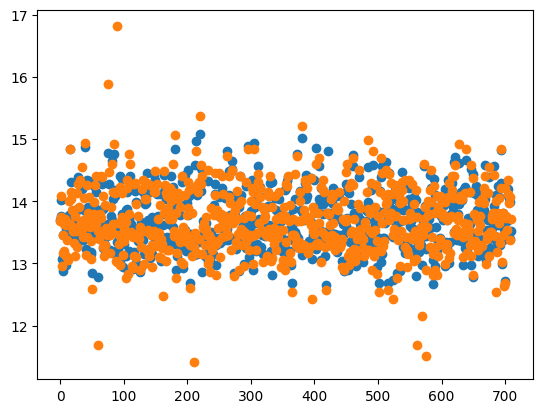

In [54]:
# plot results for MinMax scaled data 
plt.scatter(x=range(len(y_pred)), y=y_pred)
plt.scatter(x=range(len(y_test)), y=y_test)

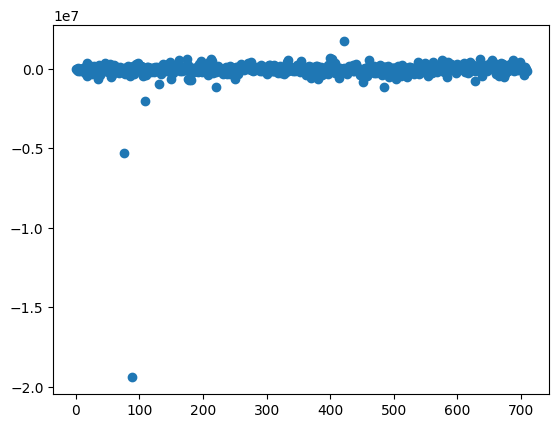

In [55]:
# plot error of true prices from MinMax scaled data
plt.scatter(x=range(len(y_pred_org)), y=(y_pred_org-y_test_org))

We can see that there are a few negative outliers.

Since we identified that house size, bed, and bath are likely to be collinear, we can use PCA to reduce dimensionality and hopefully improve the performance of our model.

Text(0, 0.5, 'cumulative explained variance')

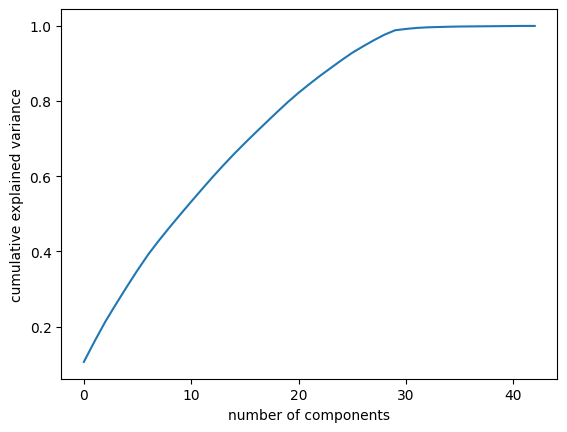

In [ ]:
# find n_components 
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
pca = PCA(n_components=27)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [58]:
# create train and test sets 
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_pca, price_norm, test_size=0.2, random_state=42)

In [ ]:
# initialize regressor 
pca_regressor = RandomForestRegressor()

# fit and predict from regressor 
pca_regressor.fit(X_pca_train, y_pca_train)
y_pca_pred = pca_regressor.predict(X_pca_test)

# revert normalized prices to true values 
y_pca_test_org = np.exp(y_pca_test)
y_pca_pred_org = np.exp(y_pca_pred)

# check error 
print(root_mean_squared_error(y_pca_test, y_pca_pred))
print(root_mean_squared_error(y_pca_test_org, y_pca_pred_org))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_pca_test_org - y_pca_pred_org) / y_pca_test_org))))

0.3038703198222553
743984.1251795226
0.42127592793179713


We find that PCA does not improve our model significantly compared to just using MinMaxScaler.

Our samples are relatively limited so [explanation]

# Ethics & Privacy

We used a public dataset from Kaggle which scraped sales data from a public real estate website. Our data does not appear to contain personal identifying information beyond what is necessary to facilitate sales (i.e. location) and the broker information was already anonymized. We removed broker information so there shouldn't be any personally identifiable information.



# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Introduction and background research was written by John Zhou

Katherine Gao
- found realtor dataset
- performed data visualizaton on realtor dataset
- performed feature engineering and RandomForest regression on realtor dataset